Author: Ichsan Arsyi Putra

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df = pd.read_csv("loan_customer.csv")

In [4]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

#### Deskripsi Dataset:
1. Dataset memiliki 621 baris (entries/records).
2. Terdapat banyak kolom yang memiliki nilai null, seperti birth_date, phone_number, dan gender. Hai ini dapat diketahui karena nilai Non-Null Count < jumlah entries.
3. Kolom birth_date memiliki tipe data yang kurang sesuai.

## Data Cleaning

#### Menangani Missing Values

In [9]:
# Memeriksa keberadaan nilai null
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [11]:
# Perbaikan tipe data birth_date menjadi datetime
df["birth_date"] = pd.to_datetime(df["birth_date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

#### Tanggapan terhadap Dataset saat ini
1. Diagnosis: Kolom has_credit_card memiliki paling banyak null values
2. Tindakan: Hapus kolom has_credit_card

In [13]:
# Hapus kolom has_credit_card
df.drop("has_credit_card", axis=1, inplace=True)
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,house,APPROVE


In [16]:
# Periksa dimensi dataset
df.shape

(621, 16)

- Langkah selanjutnya: Hapus baris/records yang memiliki nilai null.

In [20]:
# Hapus baris berisi nilai null
df.dropna(inplace=True)
df.shape

(434, 16)

- Dataset saat ini memiliki 434 baris dan 16 kolom

In [21]:
# Periksa nilai null pada dataset
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

#### Menangani Duplikasi Data

In [23]:
# Memeriksa keberadaan duplikasi data
df.duplicated().sum()

5

In [24]:
# Hapus data yang terduplikasi
df.drop_duplicates(inplace=True)

# Memeriksa kembali keberadaan duplikasi data
df.duplicated().sum()

0

#### Menangani nilai pencilan (outliers) berdasarkan kolom:
1. applicant_income
2. coapplicant_income
3. loan_amount

##### 1. Kolom applicant_income

<AxesSubplot:xlabel='applicant_income'>

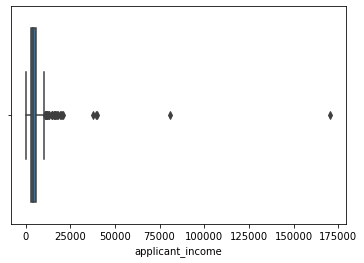

In [25]:
# Identifikasi outlier menggunakan boxpplot
sns.boxplot(x="applicant_income", data=df)

- Filter outlier menggunakan metode quantile (IQR):

In [27]:
print("Jumlah baris sebelum filter:", len(df))


# Mendapatkan Q1, Q3, dan IQR
Q1 = df["applicant_income"].quantile(0.25)
Q3 = df["applicant_income"].quantile(0.75)
IQR = Q3 - Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

# Filter dataset berdasarkan low_limit dan high_limit
df = df[(df["applicant_income"] >= low_limit) & (df["applicant_income"] <= high_limit)]

print("Jumlah baris setelah filter:", len(df))

Jumlah baris sebelum filter: 429
Jumlah baris setelah filter: 397


<AxesSubplot:xlabel='applicant_income'>

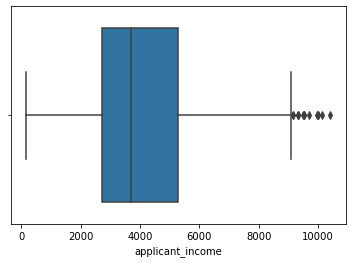

In [29]:
# Tampilan boxplot setelah filter
sns.boxplot(x="applicant_income", data=df)

##### 2. Kolom coapplicant_income

<AxesSubplot:xlabel='coapplicant_income'>

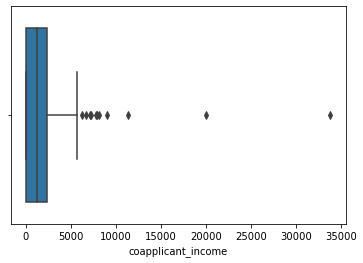

In [30]:
# Identifikasi outlier menggunakan boxpplot
sns.boxplot(x="coapplicant_income", data=df)

- Filter outlier menggunakan metode quantile (IQR):

In [31]:
print("Jumlah baris sebelum filter:", len(df))


# Mendapatkan Q1, Q3, dan IQR
Q1 = df["coapplicant_income"].quantile(0.25)
Q3 = df["coapplicant_income"].quantile(0.75)
IQR = Q3 - Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

# Filter dataset berdasarkan low_limit dan high_limit
df = df[(df["coapplicant_income"] >= low_limit) & (df["coapplicant_income"] <= high_limit)]

print("Jumlah baris setelah filter:", len(df))

Jumlah baris sebelum filter: 397
Jumlah baris setelah filter: 386


<AxesSubplot:xlabel='coapplicant_income'>

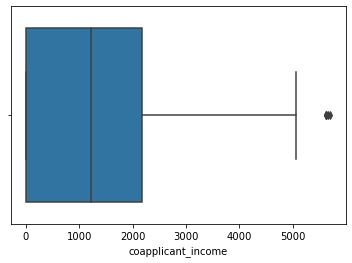

In [32]:
# Tampilan boxplot setelah filter
sns.boxplot(x="coapplicant_income", data=df)

##### 3. Kolom loan_amount

<AxesSubplot:xlabel='loan_amount'>

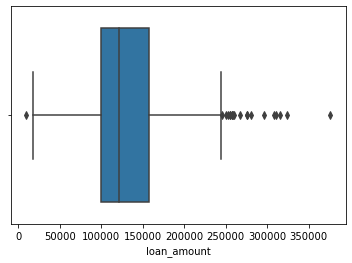

In [33]:
# Identifikasi outlier menggunakan boxpplot
sns.boxplot(x="loan_amount", data=df)

- Filter outlier menggunakan metode quantile (IQR):

In [34]:
print("Jumlah baris sebelum filter:", len(df))


# Mendapatkan Q1, Q3, dan IQR
Q1 = df["loan_amount"].quantile(0.25)
Q3 = df["loan_amount"].quantile(0.75)
IQR = Q3 - Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

# Filter dataset berdasarkan low_limit dan high_limit
df = df[(df["loan_amount"] >= low_limit) & (df["loan_amount"] <= high_limit)]

print("Jumlah baris setelah filter:", len(df))

Jumlah baris sebelum filter: 386
Jumlah baris setelah filter: 366


<AxesSubplot:xlabel='loan_amount'>

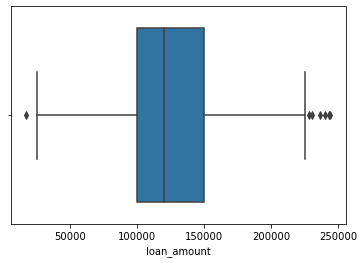

In [35]:
# Tampilan boxplot setelah filter
sns.boxplot(x="loan_amount", data=df)

## Feature Encoding (Jika diperlukan)

In [43]:
df_fe = df.copy()

# Daftar nama kolom bertipe kategorikal
cats = ["gender", "married", "dependents", "education", "self_employed", "property_type"]

# Menampilkan kategori setiap kolom
for i in cats:
    print("Kolom", i, df_fe[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '3+' '2']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


In [41]:
# Membuat Mapping/Dictionary untuk Encoding
map_gender = {
    "Male" : 0,
    "Female" : 1
}
map_married = {
    "No" : 0,
    "Yes" : 1
}
map_dependents = {
    "0" : 0,
    "1" : 1,
    "2" : 2,
    "3+" : 3
}
map_education = {
    "Not Graduate" : 0,
    "Graduate" : 1
}
map_self_employed = {
    "No" : 0,
    "Yes" : 1
}
map_property_type = {
    "house" : 0,
    "studio" : 1,
    "apartment" : 2
}

In [44]:
# Menjalankan Encoding
df_fe["gender"] = df_fe["gender"].map(map_gender)
df_fe["married"] = df_fe["married"].map(map_married)
df_fe["dependents"] = df_fe["dependents"].map(map_dependents)
df_fe["education"] = df_fe["education"].map(map_education)
df_fe["self_employed"] = df_fe["self_employed"].map(map_self_employed)
df_fe["property_type"] = df_fe["property_type"].map(map_property_type)

df_fe

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,0,0,0,1,0,5849.0,0.0,100000,360,30,1.0,0,APPROVE
1,LP001003,1979-08-24,6.287764e+11,0,1,1,1,0,4583.0,1508.0,128000,360,30,1.0,1,REJECT
2,LP001005,1991-03-28,6.281192e+11,0,1,0,1,1,3000.0,0.0,66000,360,30,1.0,0,APPROVE
3,LP001006,1980-06-02,6.285634e+10,0,1,0,0,0,2583.0,2358.0,120000,360,30,1.0,0,APPROVE
4,LP001008,1989-05-19,6.281130e+11,0,0,0,1,0,6000.0,0.0,141000,360,30,1.0,0,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,LP002964,1984-02-27,6.281191e+11,0,1,2,0,0,3987.0,1411.0,157000,360,30,1.0,1,APPROVE
615,LP002974,1988-03-24,6.285739e+11,0,1,0,1,0,3232.0,1950.0,108000,360,30,1.0,1,APPROVE
616,LP002978,1976-03-25,6.285650e+11,1,0,0,1,0,2900.0,0.0,71000,360,30,1.0,1,APPROVE
617,LP002979,1987-01-26,6.281165e+11,0,1,3,1,0,4106.0,0.0,40000,180,15,1.0,1,APPROVE


## Wawasan Bisnis (Insights)

#### 1. Analisis minat pelanggan berdasarkan pada tipe properti

In [46]:
df_mt = df.groupby(["gender", "property_type"])["loan_id"].count().reset_index()
df_mt.columns = ["gender", "property_type", "counts"]
df_mt

,gender,property_type,counts
0,Female,apartment,34
1,Female,house,16
2,Female,studio,17
3,Male,apartment,114
4,Male,house,98
5,Male,studio,87


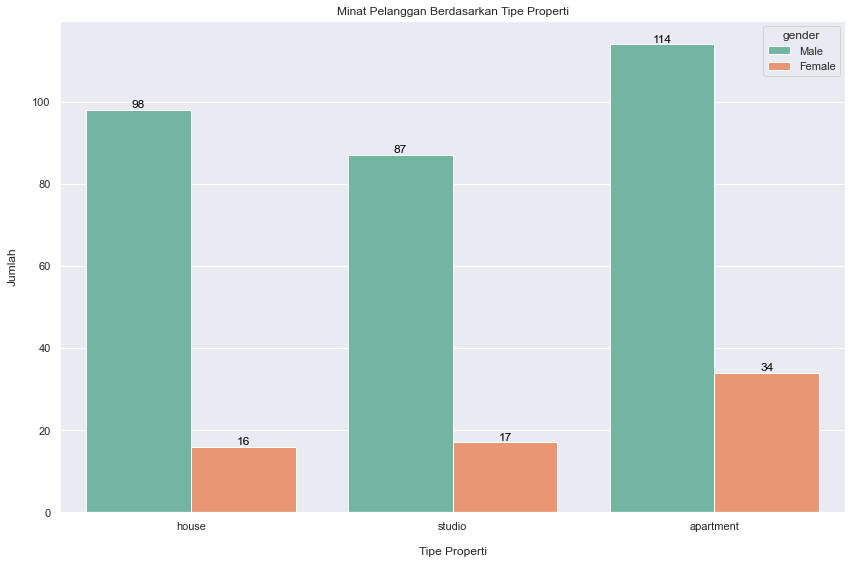

In [48]:
# Visualisasi data menggunakan diagram
sns.set(style="darkgrid")
f, ax = plt.subplots(1, 1, figsize=(12,8))
sns.countplot(x="property_type", data=df, hue="gender", palette="Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha="center", va="bottom", color="black", size=12)
    
ax.set_xlabel("Tipe Properti", labelpad=15)
ax.set_ylabel("Jumlah", labelpad=15)
ax.set_title("Minat Pelanggan Berdasarkan Tipe Properti")
plt.tight_layout()

##### Insight:
- Apartment merupakan jenis properti yang paling diminati pelanggan, baik laki-laki maupun perempuan.

#### 2. Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

In [50]:
df_sj = df.groupby(["married", "loan_term_year"])["loan_id"].count().reset_index()
df_sj.columns = ["married", "loan_term_year", "number_of_applicant"]
df_sj

,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,119
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,1


<AxesSubplot:xlabel='loan_term_year', ylabel='Count'>

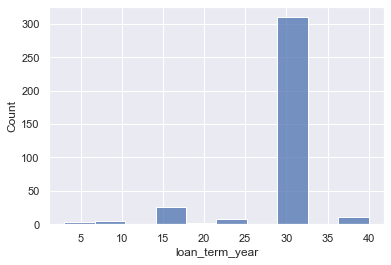

In [57]:
# Visualisasi data menggunakan histogram (tanpa mempertimbangkan status perkawinan)
sns.histplot(data=df, x="loan_term_year", bins=10, color="b")

Pengelompokan grafik ke dalam kategori:
- `<15`
- `15-25`
- `30`
- `>30`

In [59]:
loan_term_year_group = {}

for i in range(1,41):
    if i<15:
        loan_term_year_group[i] = "<15"
    elif i>=15 and i<=25:
        loan_term_year_group[i] = "15-25"
    elif i==30:
        loan_term_year_group[i] = "30"
    elif i>30:
        loan_term_year_group[i] = ">30"
    else:
        pass

print(loan_term_year_group)

{1: '<15', 2: '<15', 3: '<15', 4: '<15', 5: '<15', 6: '<15', 7: '<15', 8: '<15', 9: '<15', 10: '<15', 11: '<15', 12: '<15', 13: '<15', 14: '<15', 15: '15-25', 16: '15-25', 17: '15-25', 18: '15-25', 19: '15-25', 20: '15-25', 21: '15-25', 22: '15-25', 23: '15-25', 24: '15-25', 25: '15-25', 30: '30', 31: '>30', 32: '>30', 33: '>30', 34: '>30', 35: '>30', 36: '>30', 37: '>30', 38: '>30', 39: '>30', 40: '>30'}


In [60]:
# Membuat kolom baru berdasarkan hasil grouping
df_sj["loan_term_year_group"] = df_sj["loan_term_year"].replace(loan_term_year_group)

df_sj

,married,loan_term_year,number_of_applicant,loan_term_year_group
0,No,3,2,<15
1,No,5,1,<15
2,No,10,1,<15
3,No,15,4,15-25
4,No,25,3,15-25
5,No,30,119,30
6,No,40,6,>30
7,Yes,5,1,<15
8,Yes,7,3,<15
9,Yes,10,1,<15


Text(0, 0.5, 'Jumlah Pendaftar')

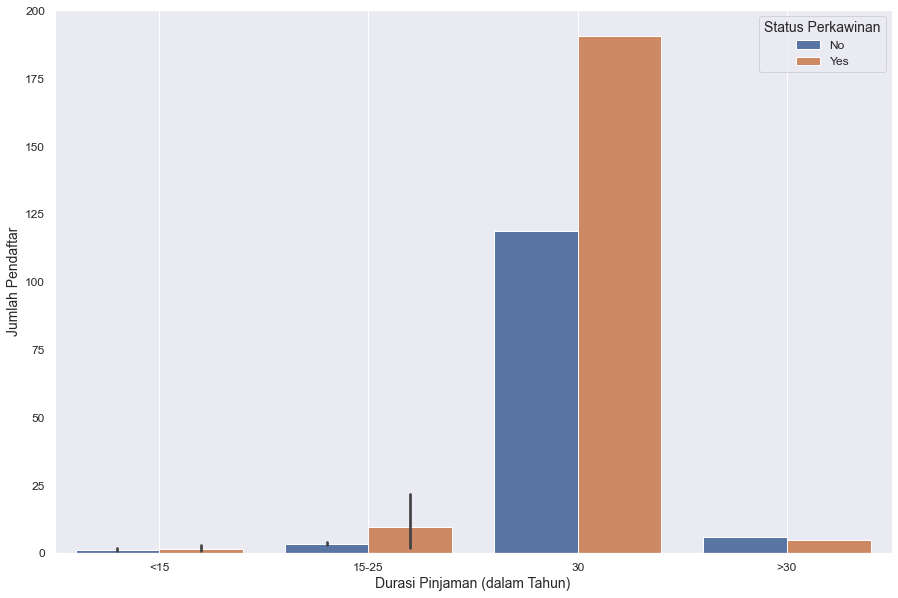

In [62]:
# Visualisasi data dengan grouping yang baru
plt.figure(figsize=(15,10))
sns.barplot(x="loan_term_year_group", y="number_of_applicant", hue="married", data=df_sj)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.grid()
plt.legend(title="Status Perkawinan", title_fontsize=14, prop={"size":12})

plt.xlabel("Durasi Pinjaman (dalam Tahun)", fontsize=14)
plt.ylabel("Jumlah Pendaftar", fontsize=14)

##### Insight:
- Pendaftar paling banyak mengajukan pinjaman dengan durasi jatuh tempo 30 tahun. Hal ini berlaku bagi pendaftar yang belum maupun sudah menikah.

## Kesimpulan

Kesimpulan dari hasil pengamatan:
1. Pendaftar pinjaman didominasi oleh laki-laki.
2. Jenis properti yang paling diminati adalah apartment.
3. Durasi pinjaman terfavorit bagi pendaftar adalah 30 tahun. Hal ini terjadi pada pendaftar yang belum maupun sudah menikah.

Selengkapnya di:
[Repositori Github Saya](https://github.com/ichsanarsyi/ds-bank-loan-analisys)